In [1]:
# ========================================
# Section A: Data Understanding & Cleaning
# ========================================

# Task 1: Data Loading & Initial Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plots
%matplotlib inline
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("titles.csv")  

# Display first 10 rows
df.head(10)

# Check number of rows and columns
df.shape

# Basic info and stats
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [2]:
# Task 2: Data Cleaning

# Check missing values
df.isnull().sum()

# Fill missing values or handle them
# For categorical columns, fill with 'Unknown'
categorical_cols = ['type', 'age_certification', 'genres', 'production_countries']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# For numeric columns, fill with median
numeric_cols = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'seasons']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Convert release_year to integer (if needed)
df['release_year'] = df['release_year'].astype(int)

# Standardize text formatting
text_cols = ['title', 'type', 'genres', 'age_certification', 'production_countries']
for col in text_cols:
    df[col] = df[col].str.strip().str.title()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check final dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9749 non-null   object 
 4   release_year          9868 non-null   int32  
 5   age_certification     9868 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9868 non-null   object 
 8   production_countries  9868 non-null   object 
 9   seasons               9868 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            9868 non-null   float64
 12  imdb_votes            9868 non-null   float64
 13  tmdb_popularity       9868 non-null   float64
 14  tmdb_score            9868 non-null   float64
dtypes: float64(5), int32(

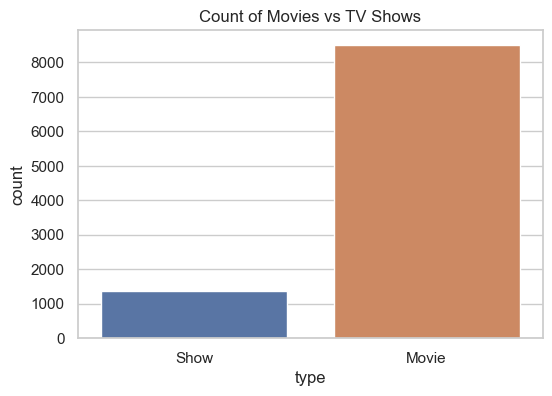

Movie    8511
Show     1357
Name: type, dtype: int64

In [3]:
# ========================================
# Section B: Univariate Analysis
# ========================================

# Task 3: Content Types
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows')
plt.show()

df['type'].value_counts()


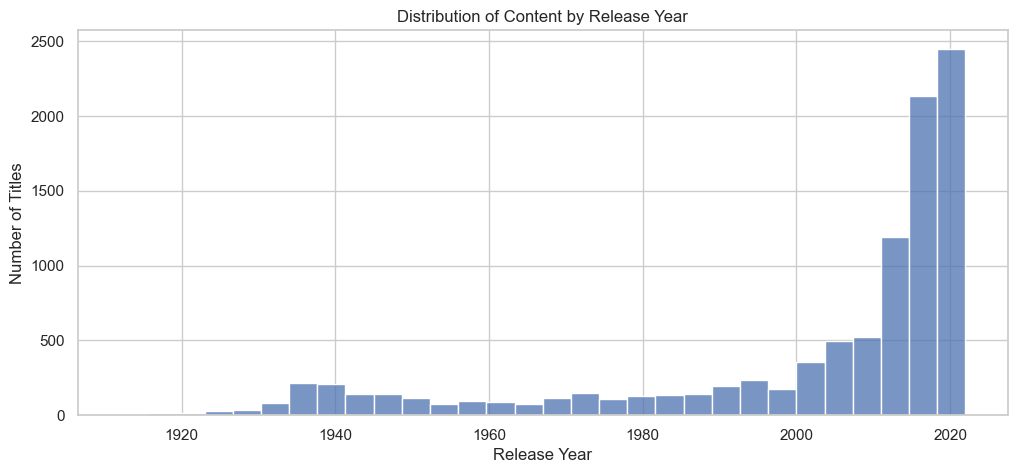

In [4]:
# Task 4: Release Year Distribution
plt.figure(figsize=(12,5))
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title('Distribution of Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


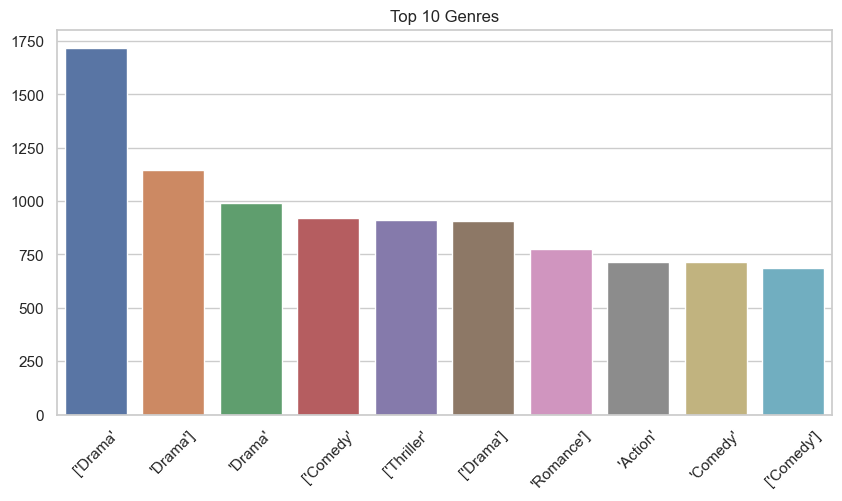

In [5]:
# Task 5: Genre Distribution (top 10)
# Some titles have multiple genres separated by commas
from collections import Counter

genre_list = df['genres'].str.split(',').sum()
genre_count = Counter([g.strip() for g in genre_list if g != 'Unknown'])

top10_genres = dict(genre_count.most_common(10))

plt.figure(figsize=(10,5))
sns.barplot(x=list(top10_genres.keys()), y=list(top10_genres.values()))
plt.title('Top 10 Genres')
plt.xticks(rotation=45)
plt.show()


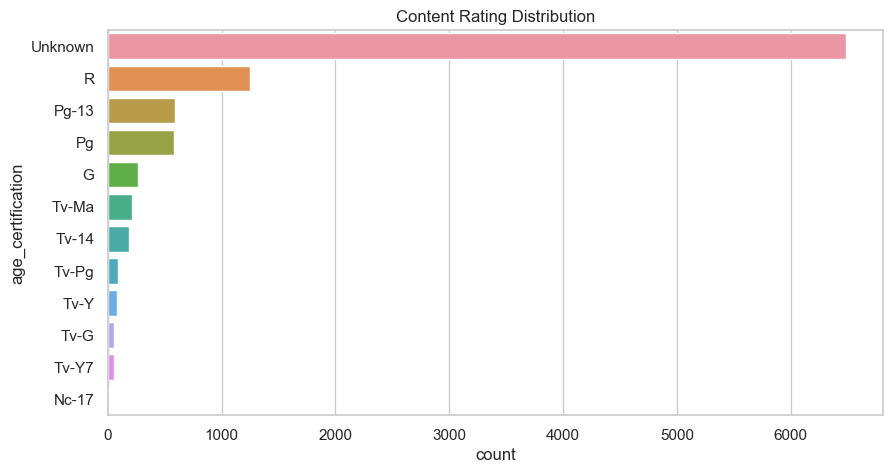

In [6]:
# Task 6: Ratings
plt.figure(figsize=(10,5))
sns.countplot(y='age_certification', data=df, order=df['age_certification'].value_counts().index)
plt.title('Content Rating Distribution')
plt.show()


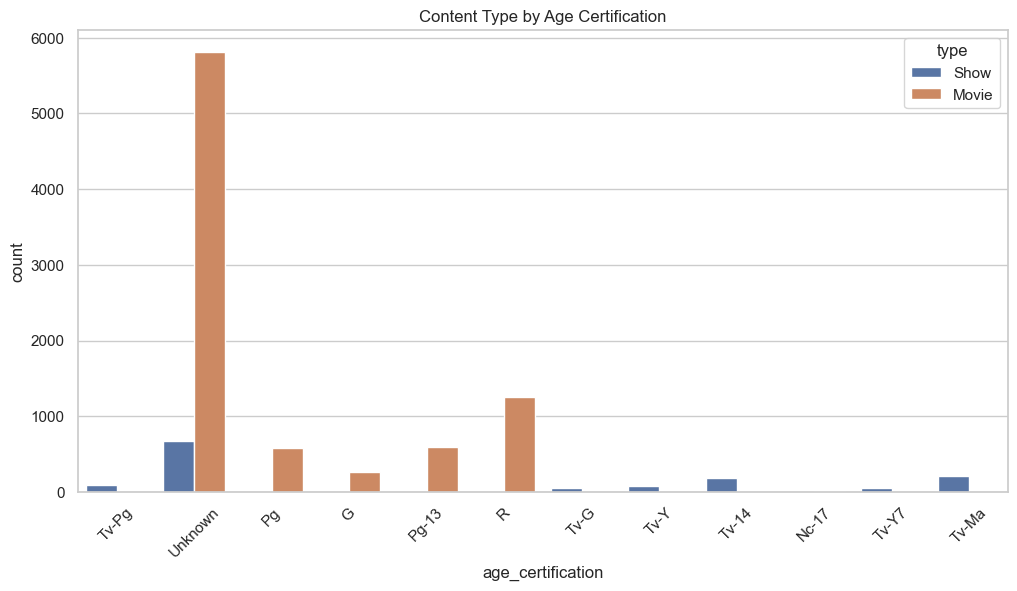

In [7]:
# ========================================
# Section C: Bivariate Analysis
# ========================================

# Task 7: Content Type by Rating
plt.figure(figsize=(12,6))
sns.countplot(x='age_certification', hue='type', data=df)
plt.title('Content Type by Age Certification')
plt.xticks(rotation=45)
plt.show()


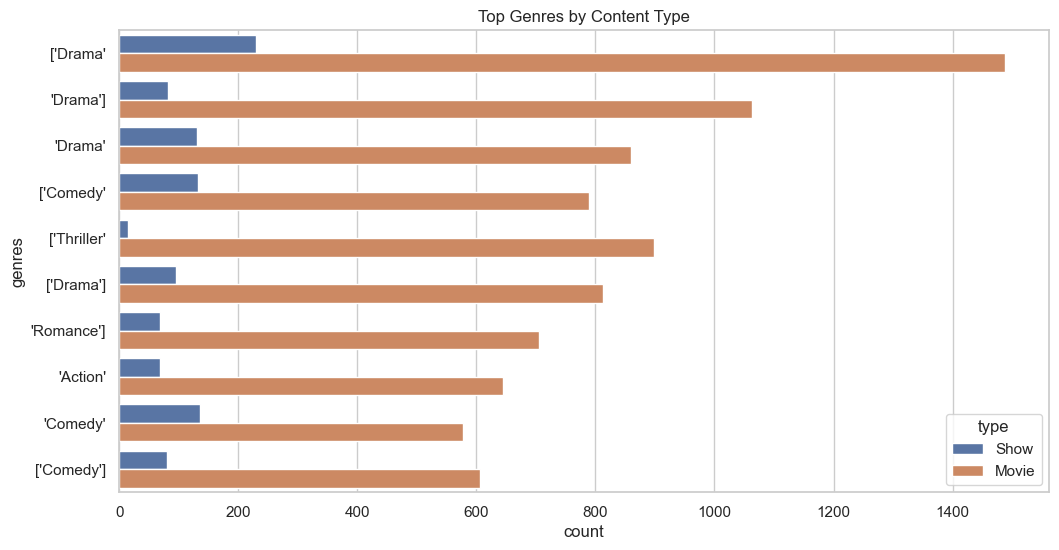

In [8]:
# Task 8: Genre by Type
# Explode genres column for analysis
df_exploded = df.copy()
df_exploded['genres'] = df_exploded['genres'].str.split(',')
df_exploded = df_exploded.explode('genres')
df_exploded['genres'] = df_exploded['genres'].str.strip()

plt.figure(figsize=(12,6))
sns.countplot(y='genres', hue='type', data=df_exploded, order=df_exploded['genres'].value_counts().index[:10])
plt.title('Top Genres by Content Type')
plt.show()


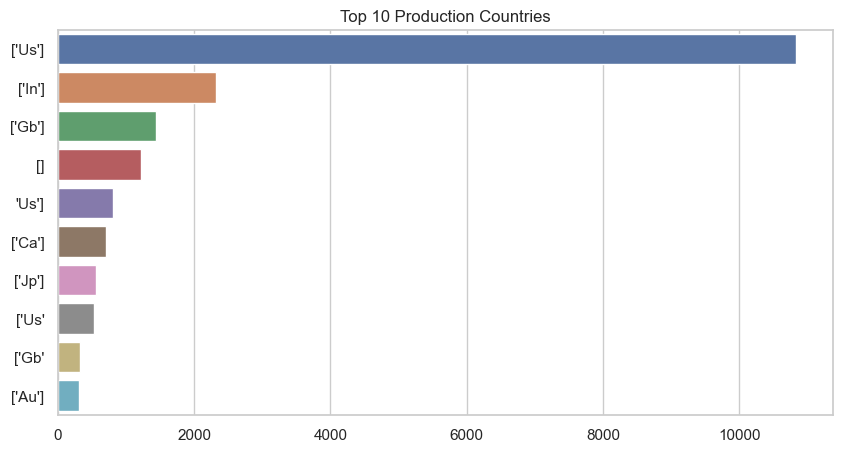

In [9]:
# Task 9: Country-wise Analysis (top 10)
df_exploded['production_countries'] = df_exploded['production_countries'].str.split(',')
df_exploded = df_exploded.explode('production_countries')
df_exploded['production_countries'] = df_exploded['production_countries'].str.strip()

top10_countries = df_exploded['production_countries'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10_countries.values, y=top10_countries.index)
plt.title('Top 10 Production Countries')
plt.show()


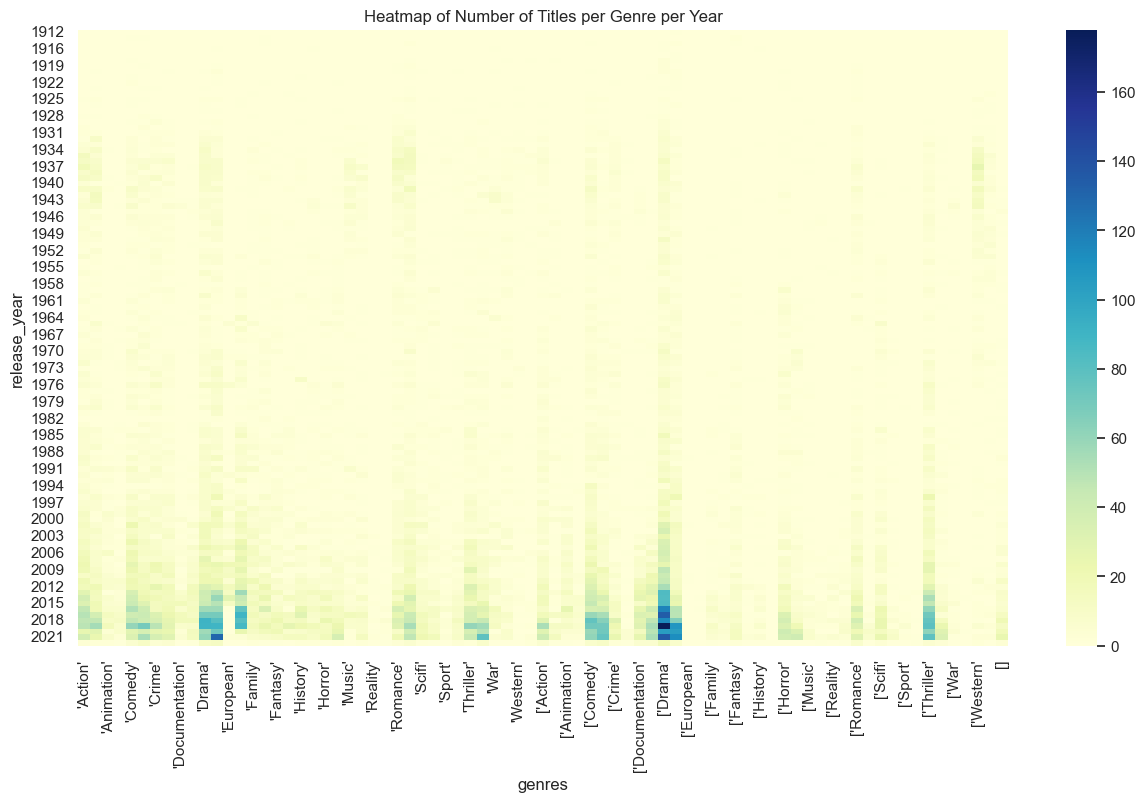

In [10]:
# Task 10: Year vs Genre Heatmap
genre_year = df_exploded.groupby(['release_year','genres']).size().unstack(fill_value=0)
plt.figure(figsize=(15,8))
sns.heatmap(genre_year, cmap="YlGnBu")
plt.title('Heatmap of Number of Titles per Genre per Year')
plt.show()


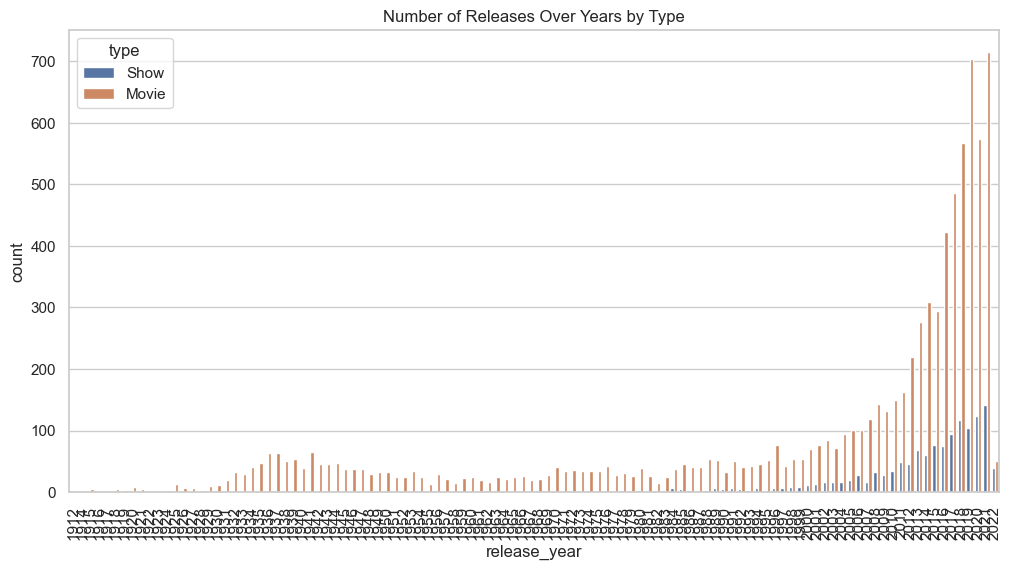

In [11]:
# ========================================
# Section D: Time-Based Trends
# ========================================

# Task 11: Content Release Over Time
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', hue='type', data=df)
plt.xticks(rotation=90)
plt.title('Number of Releases Over Years by Type')
plt.show()


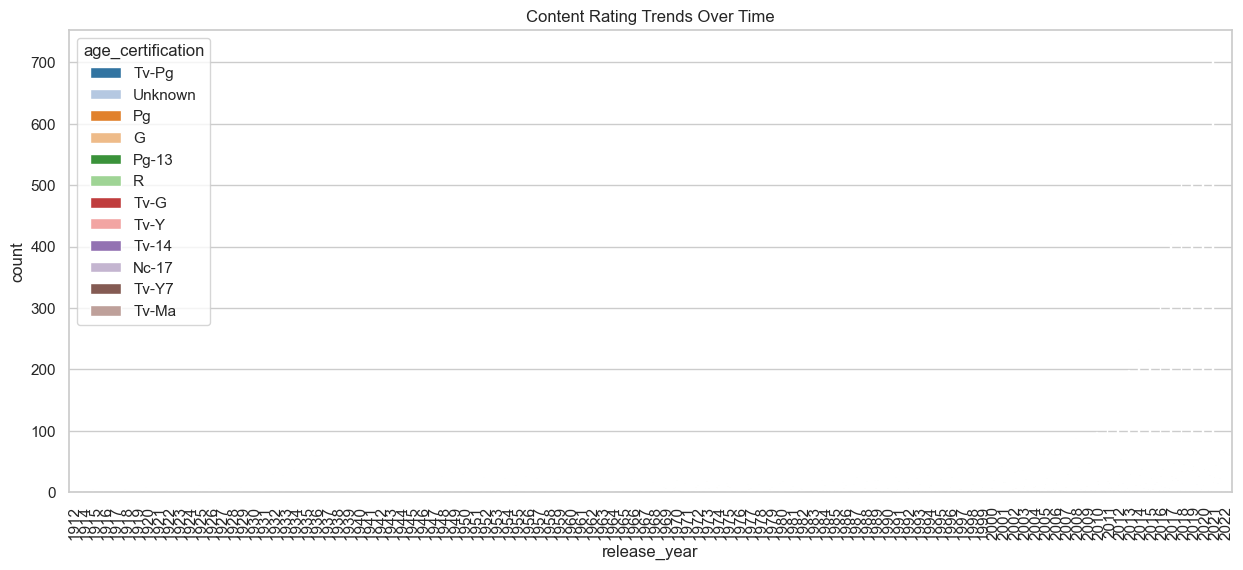

In [12]:
# Task 12: Rating Trends Over Time
plt.figure(figsize=(15,6))
sns.countplot(x='release_year', hue='age_certification', data=df, palette='tab20')
plt.xticks(rotation=90)
plt.title('Content Rating Trends Over Time')
plt.show()


Columns in credits.csv: Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')
Sample roles: ['ACTOR' 'DIRECTOR']


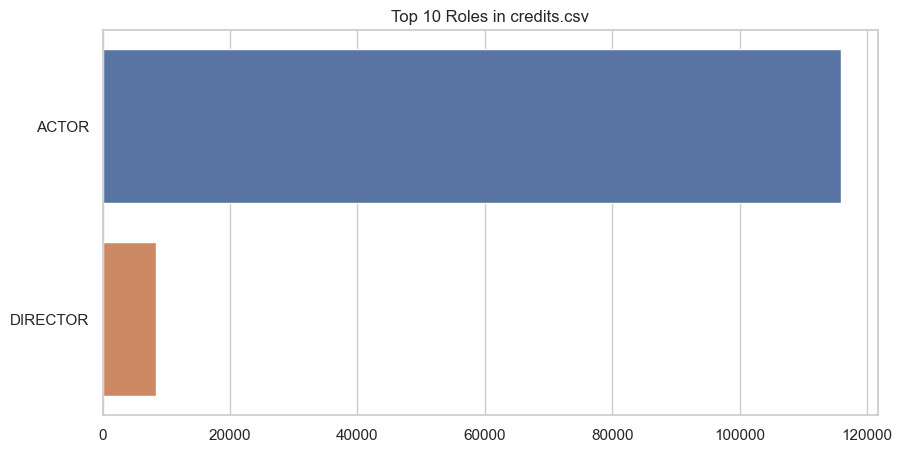

In [13]:
# ========================================
# Section E: Advanced Grouping & Insights
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ------------------------------
# Task 13: Most Frequent Directors & Actors
# ------------------------------

# Try to read credits.csv if available
try:
    df_credits = pd.read_csv("credits.csv")  # replace with your file path
except FileNotFoundError:
    df_credits = None
    print("credits.csv file not found. Skipping director/actor analysis.")

if df_credits is not None:
    # Check columns in credits.csv
    print("Columns in credits.csv:", df_credits.columns)

    # Option 1: If 'role' column exists, use it
    if 'role' in df_credits.columns:
        # Inspect first 20 unique roles to understand format
        print("Sample roles:", df_credits['role'].unique()[:20])
        
        # Split role into type and name if colon exists
        if df_credits['role'].str.contains(':').any():
            df_credits['role_type'] = df_credits['role'].apply(lambda x: x.split(':')[0].strip() if ':' in x else 'Unknown')
            df_credits['name'] = df_credits['role'].apply(lambda x: x.split(':')[1].strip() if ':' in x else x.strip())
            
            # Top 10 Directors
            top_directors = df_credits[df_credits['role_type'].str.contains('Director', case=False)]['name'].value_counts().head(10)
            if not top_directors.empty:
                plt.figure(figsize=(10,5))
                sns.barplot(x=top_directors.values, y=top_directors.index)
                plt.title('Top 10 Directors')
                plt.show()
            else:
                print("No Directors found in credits.csv.")
            
            # Top 10 Actors
            top_actors = df_credits[df_credits['role_type'].str.contains('Actor', case=False)]['name'].value_counts().head(10)
            if not top_actors.empty:
                plt.figure(figsize=(10,5))
                sns.barplot(x=top_actors.values, y=top_actors.index)
                plt.title('Top 10 Actors')
                plt.show()
            else:
                print("No Actors found in credits.csv.")
        
        # Option 2: If colon not present, show top roles overall
        else:
            top_roles = df_credits['role'].value_counts().head(10)
            if not top_roles.empty:
                plt.figure(figsize=(10,5))
                sns.barplot(x=top_roles.values, y=top_roles.index)
                plt.title('Top 10 Roles in credits.csv')
                plt.show()
            else:
                print("No role data available.")


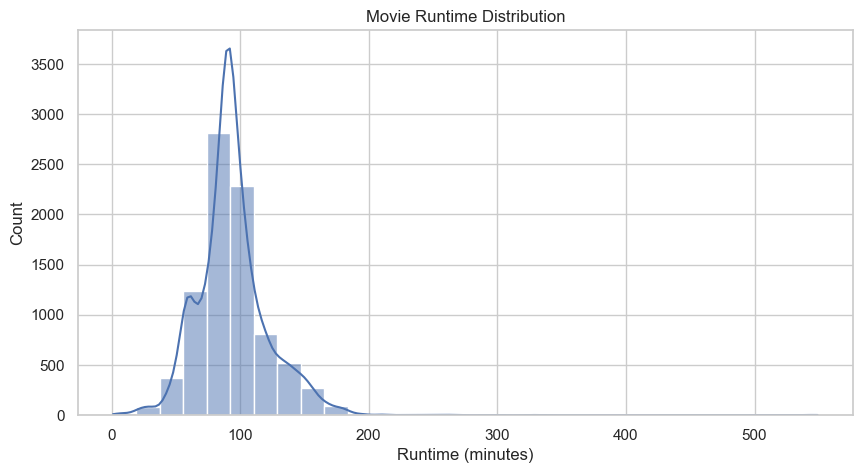

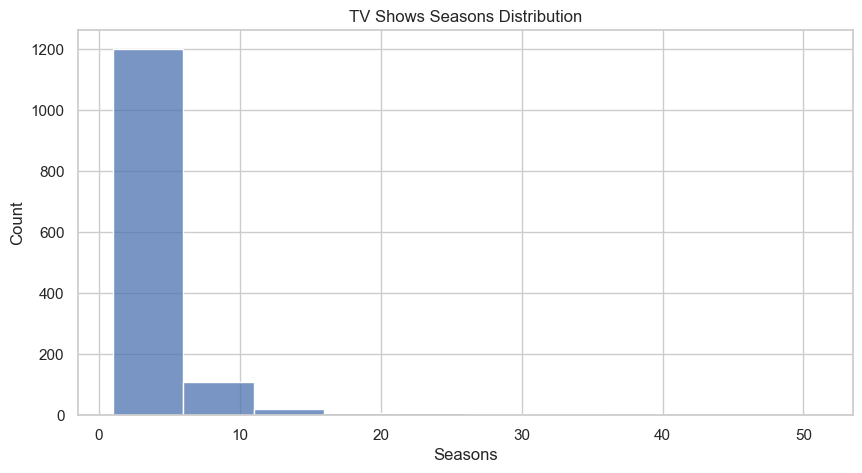

In [14]:
# ------------------------------
# Task 14: Content Duration Analysis
# ------------------------------

# Movies runtime
if 'runtime' in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[df['type']=='Movie']['runtime'], bins=30, kde=True)
    plt.title('Movie Runtime Distribution')
    plt.xlabel('Runtime (minutes)')
    plt.show()

# TV Shows seasons
if 'seasons' in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[df['type']=='Show']['seasons'], bins=10, kde=False)  # Corrected 'TV Show'
    plt.title('TV Shows Seasons Distribution')
    plt.xlabel('Seasons')
    plt.show()


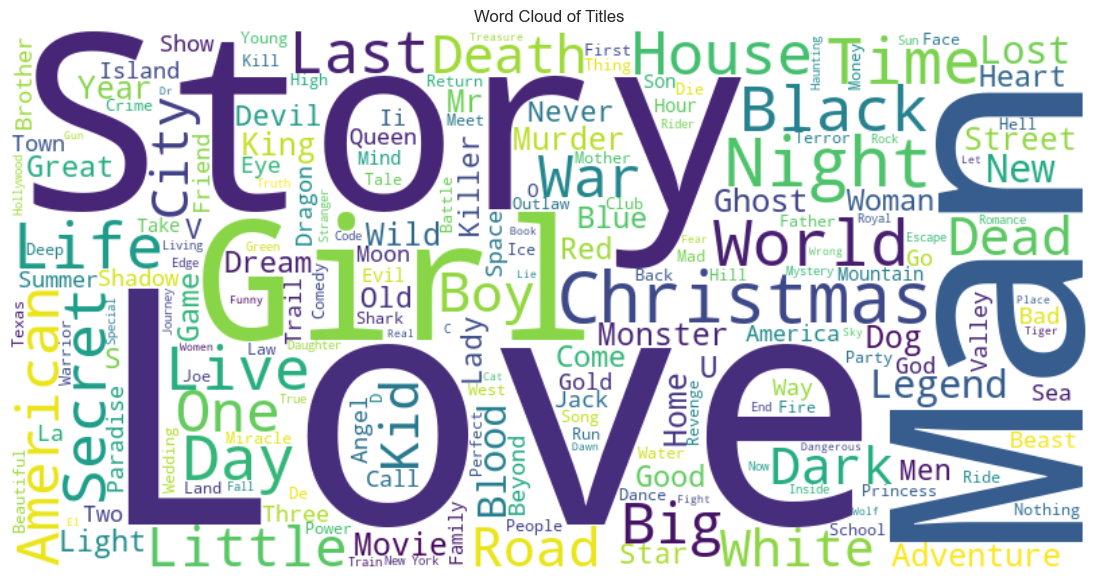


Top genres in titles containing 'Love':
[("'Romance']", 46), ("['Drama'", 42), ("['Comedy'", 31), ("['Romance'", 29), ("'Drama']", 26)]

Top genres in titles containing 'War':
[("'Action'", 17), ("['Comedy']", 15), ("['Drama'", 14), ("['Documentation']", 14), ("'War']", 10)]

Top genres in titles containing 'Christmas':
[("['Comedy'", 19), ("'Romance']", 17), ("'Family']", 16), ("'Drama'", 11), ("'Comedy'", 10)]


In [15]:
# ------------------------------
# Task 15: Keyword Analysis in Titles (Bonus)
# ------------------------------

if 'title' in df.columns:
    all_titles = ' '.join(df['title'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

    plt.figure(figsize=(15,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Titles')
    plt.show()

    # Example: common genres in titles containing specific words
    for keyword in ['Love', 'War', 'Christmas']:
        filtered_titles = df[df['title'].str.contains(keyword, case=False, na=False)]
        if 'genres' in df.columns:
            keyword_genres = filtered_titles['genres'].str.split(',').sum()
            from collections import Counter
            keyword_genre_count = Counter([g.strip() for g in keyword_genres if g != 'Unknown'])
            print(f"\nTop genres in titles containing '{keyword}':")
            print(keyword_genre_count.most_common(5))